# Cohen-Sutherland line clipping 

### 1. Completely inside

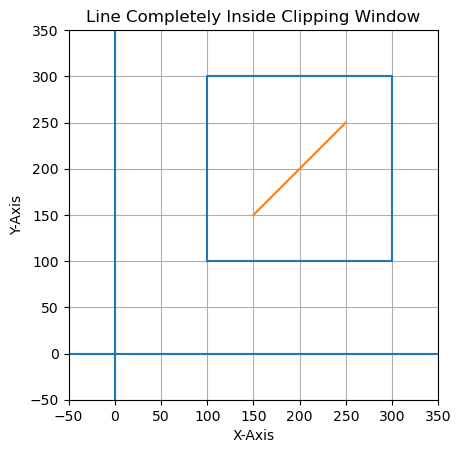

In [17]:
import matplotlib.pyplot as plt

# Clipping window boundaries
xmin, ymin = 100, 100
xmax, ymax = 300, 300

# Line completely inside
x1, y1 = 150, 150
x2, y2 = 250, 250

plt.figure()

# Draw clipping window
plt.plot([xmin, xmax, xmax, xmin, xmin],
         [ymin, ymin, ymax, ymax, ymin])

# Draw line
plt.plot([x1, x2], [y1, y2])

# Draw X and Y axes
plt.axhline(0)
plt.axvline(0)

# Graph settings
plt.xlim(-50, 350)
plt.ylim(-50, 350)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

plt.title("Line Completely Inside Clipping Window")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

plt.show()

### 2. Completely outside

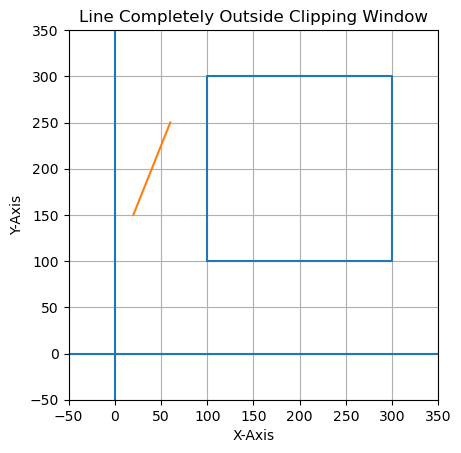

In [20]:
import matplotlib.pyplot as plt

# Clipping window boundaries
xmin, ymin = 100, 100
xmax, ymax = 300, 300

# Line completely outside (left side)
x1, y1 = 20, 150
x2, y2 = 60, 250

plt.figure()

# Draw clipping window
plt.plot([xmin, xmax, xmax, xmin, xmin],
         [ymin, ymin, ymax, ymax, ymin])

# Draw line
plt.plot([x1, x2], [y1, y2])

# Draw X and Y axes
plt.axhline(0)
plt.axvline(0)

# Graph settings
plt.xlim(-50, 350)
plt.ylim(-50, 350)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title("Line Completely Outside Clipping Window")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

plt.show()

### 3. Partially inside (one point intersection)

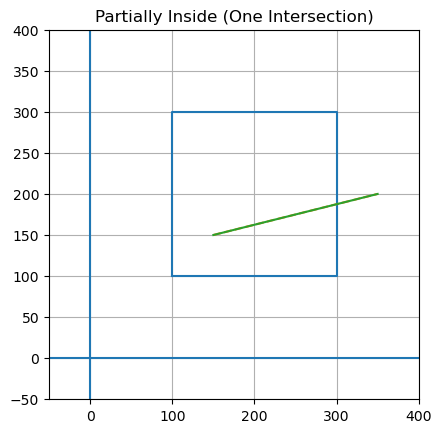

In [15]:
import matplotlib.pyplot as plt

xmin, ymin = 100, 100
xmax, ymax = 300, 300

INSIDE, LEFT, RIGHT, BOTTOM, TOP = 0, 1, 2, 4, 8

def compute_code(x, y):
    code = INSIDE
    if x < xmin: code |= LEFT
    elif x > xmax: code |= RIGHT
    if y < ymin: code |= BOTTOM
    elif y > ymax: code |= TOP
    return code

def clip(x1, y1, x2, y2):
    code1 = compute_code(x1, y1)
    code2 = compute_code(x2, y2)

    while code1 != 0:
        if code1 & RIGHT:
            y1 = y1 + (y2-y1)*(xmax-x1)/(x2-x1)
            x1 = xmax
        code1 = compute_code(x1,y1)
    return x1, y1, x2, y2

# One point outside
x1, y1 = 150, 150
x2, y2 = 350, 200

cx1, cy1, cx2, cy2 = clip(x1, y1, x2, y2)

plt.plot([xmin,xmax,xmax,xmin,xmin],[ymin,ymin,ymax,ymax,ymin])
plt.plot([x1,x2],[y1,y2],'--')
plt.plot([cx1,cx2],[cy1,cy2])

plt.axhline(0); plt.axvline(0)
plt.xlim(-50,400); plt.ylim(-50,400)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.title("Partially Inside (One Intersection)")
plt.show()

### 4.Partially inside ( two point intersection)

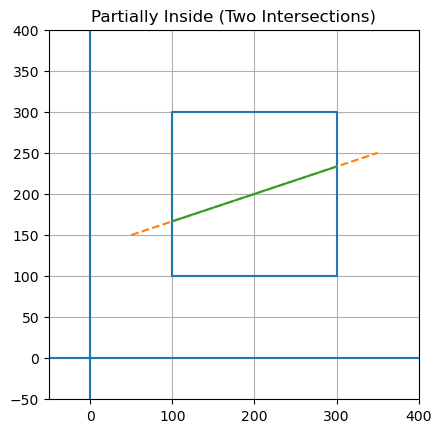

In [16]:
import matplotlib.pyplot as plt

xmin, ymin = 100, 100
xmax, ymax = 300, 300

INSIDE, LEFT, RIGHT, BOTTOM, TOP = 0, 1, 2, 4, 8

def compute_code(x, y):
    code = INSIDE
    if x < xmin: code |= LEFT
    elif x > xmax: code |= RIGHT
    if y < ymin: code |= BOTTOM
    elif y > ymax: code |= TOP
    return code

def clip(x1, y1, x2, y2):
    code1 = compute_code(x1, y1)
    code2 = compute_code(x2, y2)

    while True:
        if code1 == 0 and code2 == 0:
            return x1, y1, x2, y2
        if code1 & code2:
            return None
        if code1 != 0:
            code_out = code1
        else:
            code_out = code2

        if code_out & LEFT:
            y = y1 + (y2-y1)*(xmin-x1)/(x2-x1)
            x = xmin
        elif code_out & RIGHT:
            y = y1 + (y2-y1)*(xmax-x1)/(x2-x1)
            x = xmax

        if code_out == code1:
            x1, y1 = x, y
            code1 = compute_code(x1,y1)
        else:
            x2, y2 = x, y
            code2 = compute_code(x2,y2)

# Both outside but crossing
x1, y1 = 50, 150
x2, y2 = 350, 250

result = clip(x1, y1, x2, y2)

plt.plot([xmin,xmax,xmax,xmin,xmin],[ymin,ymin,ymax,ymax,ymin])
plt.plot([x1,x2],[y1,y2],'--')

if result:
    cx1, cy1, cx2, cy2 = result
    plt.plot([cx1,cx2],[cy1,cy2])

plt.axhline(0); plt.axvline(0)
plt.xlim(-50,400); plt.ylim(-50,400)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.title("Partially Inside (Two Intersections)")
plt.show()

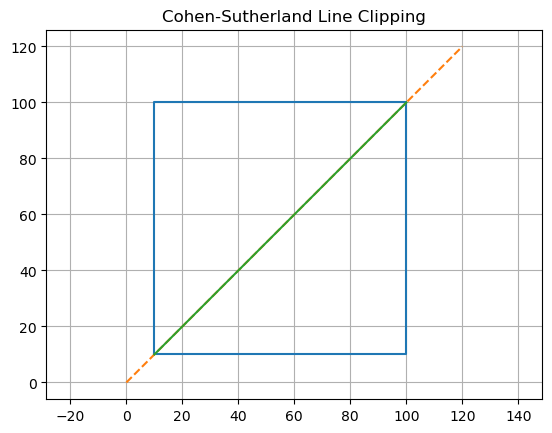

In [18]:
import matplotlib.pyplot as plt

INSIDE = 0
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP = 8

def find_code(x, y, xmin, ymin, xmax, ymax):
    code = INSIDE

    if x < xmin:
        code += LEFT
    elif x > xmax:
        code += RIGHT

    if y < ymin:
        code += BOTTOM
    elif y > ymax:
        code += TOP

    return code


def cohen_sutherland(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    code1 = find_code(x1, y1, xmin, ymin, xmax, ymax)
    code2 = find_code(x2, y2, xmin, ymin, xmax, ymax)

    while True:
        # Case 1: Both inside
        if code1 == 0 and code2 == 0:
            return x1, y1, x2, y2

        # Case 2: Both outside (trivial reject)
        elif (code1 & code2) != 0:
            return None

        # Case 3: Partial clipping
        else:
            if code1 != 0:
                code_out = code1
            else:
                code_out = code2

            if code_out & TOP:
                x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
                y = ymax

            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
                y = ymin

            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
                x = xmax

            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
                x = xmin

            if code_out == code1:
                x1, y1 = x, y
                code1 = find_code(x1, y1, xmin, ymin, xmax, ymax)
            else:
                x2, y2 = x, y
                code2 = find_code(x2, y2, xmin, ymin, xmax, ymax)


def draw(original, clipped, xmin, ymin, xmax, ymax):
    # Draw clipping window
    plt.plot([xmin, xmax, xmax, xmin, xmin],
             [ymin, ymin, ymax, ymax, ymin])

    # Draw original line (dashed)
    x1, y1, x2, y2 = original
    plt.plot([x1, x2], [y1, y2], '--')

    # Draw clipped line
    if clipped is not None:
        cx1, cy1, cx2, cy2 = clipped
        plt.plot([cx1, cx2], [cy1, cy2])

    plt.title("Cohen-Sutherland Line Clipping")
    plt.axis("equal")
    plt.grid(True)
    plt.show()


# Example
xmin, ymin = 10, 10
xmax, ymax = 100, 100

original = (0, 0, 120, 120)
clipped = cohen_sutherland(0, 0, 120, 120, xmin, ymin, xmax, ymax)

draw(original, clipped, xmin, ymin, xmax, ymax)